### Постановка задачи: Анализ эффективности рекламной кампании

Компания провела A/B-тестирование для оценки влияния рекламной кампании на конверсию и взаимодействие с рекламными материалами. У нас есть данные, включающие информацию о пользователях, их принадлежности к контрольной и тестовой группам, конверсии, количестве увиденной рекламы и других параметрах. Задача состоит в проведении комплексного анализа с учетом следующих шагов:

1) **Предобработка данных:**

- Изучение структуры данных и их типов.
- Преобразование столбцов к необходимым типам данных.
- Проверка данных на наличие пропусков и их обработка.
- Проверка наличия пользователей, попавших в обе группы, и исключение их из анализа.

2) **Первичный анализ результатов A/B-тестирования:**

- Рассчет вспомогательных показателей для контрольной и тестовой групп (количество посещений сайта, суммарное количество совершенных покупок).
- Промежуточные выводы о сбалансированности выборок.

3) **Статистические тесты для проверки гипотез:**

- Сформулировать статистические гипотезы, соответствующие бизнес-вопросам.
- Выбор статистического теста для проверки гипотез, учитывая нормальность данных.
- Провести статистические тесты для оценки различий в конверсии и среднем количестве увиденной рекламы между группами.

4) **Доверительные интервалы:**

- Построение 95% доверительных интервалов для конверсии в каждой из групп, разницы конверсий и среднего количества увиденной рекламы в каждой из групп.

5) **Выводы:**

- Составление окончательного вывода по результатам анализа.
- Оценка успеха рекламной кампании и ее влияния на конверсию.

Задача заключается в том, чтобы предоставить компании информацию, которая поможет принять обоснованные решения относительно эффективности проведенной рекламной кампании.

## Предобработка данных

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('/Users/nadiagolub/Downloads/marketing_AB 2.csv')

# Исследование структуры данных
print(data.head())  # Вывод первых строк данных
print(data.info())  # Общая информация о структуре данных

# Преобразование столбцов к необходимым типам данных
data['converted'] = data['converted'].astype(bool)
data['total ads'] = data['total ads'].astype(int)

# Проверка наличия пропусков и их удаление
print(data.isnull().sum())  # Вывод количества пропущенных значений по каждому столбцу
data = data.dropna()  # Удаление строк с пропущенными значениями

# Проверка наличия пользователей, попавших в обе группы
duplicated_users = data[data.duplicated(subset=['user id'], keep=False)]
data = data.drop_duplicates(subset=['user id'], keep='first')  # Исключение дубликатов

# Первичный анализ результатов A/B-тестирования
control_group = data[data['test group'] == 'psa']
test_group = data[data['test group'] == 'ad']

# Вспомогательные показатели для контрольной и тестовой групп
visits_control = control_group.shape[0]
purchases_control = control_group[control_group['converted']].shape[0]

visits_test = test_group.shape[0]
purchases_test = test_group[test_group['converted']].shape[0]

# Вывод результатов
print(f"Количество посещений в контрольной группе: {visits_control}")
print(f"Суммарное количество совершённых покупок в контрольной группе: {purchases_control}")
print(f"Количество посещений в тестовой группе: {visits_test}")
print(f"Суммарное количество совершённых покупок в тестовой группе: {purchases_test}")


   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null

### Исходные данные:

1. **Сравнение количества посещений:**
   - *Контрольная группа (psa):* 23,524 посещения.
   - *Тестовая группа (ad):* 564,577 посещений.

   Количество посещений тестовой группы значительно превышает количество посещений контрольной группы. Это может создать некоторые трудности при сравнении результатов, поскольку обе группы должны быть сопоставимыми.

2. **Сбалансированность выборок:**
   - *Контрольная группа (psa):* 23,524 посещения, 420 покупок.
   - *Тестовая группа (ad):* 564,577 посещений, 14,423 покупок.

   Несмотря на большое количество посещений в тестовой группе, количество покупок в контрольной группе относительно меньше. Это может быть вызвано различиями в конверсии между группами.

### Промежуточные выводы:

- Объем данных в тестовой группе значительно больше, что может повлиять на статистическую значимость результатов.
- Сбалансированность по количеству покупок между группами требует дополнительного анализа, чтобы оценить эффективность рекламной кампании.


In [19]:
# Рассчитываем ключевые показатели для контрольной группы
control_group = data[data['test group'] == 'psa']
conversion_control = control_group['converted'].mean()
mean_ads_control = control_group['total ads'].mean()

# Рассчитываем ключевые показатели для тестовой группы
test_group = data[data['test group'] == 'ad']
conversion_test = test_group['converted'].mean()
mean_ads_test = test_group['total ads'].mean()

# Вывод результатов
print(f"Ключевые показатели для контрольной группы:")
print(f"Конверсия: {conversion_control:.2%}")
print(f"Среднее количество рекламы: {mean_ads_control:.2f}")

print("\n")

print(f"Ключевые показатели для тестовой группы:")
print(f"Конверсия: {conversion_test:.2%}")
print(f"Среднее количество рекламы: {mean_ads_test:.2f}")


Ключевые показатели для контрольной группы:
Конверсия: 1.79%
Среднее количество рекламы: 24.76


Ключевые показатели для тестовой группы:
Конверсия: 2.55%
Среднее количество рекламы: 24.82


## Первичный анализ результатов A/B-тестирования::

**1. Конверсия:**
   - *Контрольная группа:* 1.79%
   - *Тестовая группа:* 2.55%

   На первый взгляд, тестовая группа показывает более высокий уровень конверсии (2.55% против 1.79% в контрольной группе), что может свидетельствовать о более эффективной рекламной кампании.

**2. Среднее количество рекламы:**
   - *Контрольная группа:* 24.76
   - *Тестовая группа:* 24.82

   Среднее количество рекламы практически одинаково в обеих группах, что может говорить о сопоставимости интенсивности рекламного воздействия.

### Общий вывод:

На основе первичного анализа, тестовая группа демонстрирует более высокую конверсию, что может свидетельствовать о более успешной рекламной кампании. Однако различие в среднем количестве рекламы невелико и требует более глубокого анализа для вынесения окончательных выводов.


In [20]:
columns_to_check = ['converted', 'total ads', 'most ads hour']

# Перечень групп
groups = ['ad', 'psa']

for column in columns_to_check:
    for group in groups:
        # Выбор данных для текущей группы и показателя
        data_to_check = data[(data['test group'] == group)][column]
        
        # Проверка на нормальность с использованием теста Шапиро-Уилка
        stat, p_value = shapiro(data_to_check)
        
        # Вывод результатов
        print(f'Shapiro-Wilk Test for {column} in {group} group (p-value): {p_value}')

Shapiro-Wilk Test for converted in ad group (p-value): 0.0
Shapiro-Wilk Test for converted in psa group (p-value): 0.0
Shapiro-Wilk Test for total ads in ad group (p-value): 0.0


/Users/nadiagolub/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test for total ads in psa group (p-value): 0.0
Shapiro-Wilk Test for most ads hour in ad group (p-value): 0.0
Shapiro-Wilk Test for most ads hour in psa group (p-value): 0.0


**Вывод:**
Результаты теста Шапиро-Уилка указывают на то, что данные не подчиняются нормальному распределению. Такие низкие p-значения (меньше общепринятого уровня значимости 0.05) говорят о том, что  есть статистически значимые доказательства отклонения от нормальности.

## Статистические гипотезы для поставленных бизнес-вопросов:

**Гипотеза о успешности кампании:**

- Нулевая гипотеза (H0): Средняя конверсия в продажи между контрольной и тестовой группами не отличается.
- Альтернативная гипотеза (H1): Средняя конверсия в продажи в тестовой группе выше, чем в контрольной.
**Гипотеза об эффективности рекламы:**

- Нулевая гипотеза (H0): Среднее количество рекламы, увиденной пользователями в контрольной и тестовой группах, не отличается.
- Альтернативная гипотеза (H1): Среднее количество рекламы, увиденной пользователями в тестовой группе, больше, чем в контрольной.

Выбор статистического теста зависит от природы данных и формулировки гипотез:

**Для проверки конверсии:**

- Используйте t-тест для независимых выборок, так как у вас две независимые группы (контрольная и тестовая).

**Для проверки эффективности рекламы:**

- Также можно использовать t-тест для независимых выборок, так как у вас две независимые группы.
Тем не менее, учитывая, что данные не прошли тест на нормальность, может быть разумным воспользоваться непараметрическими альтернативами, такими как Mann-Whitney U-тест или аналогичные тесты для независимых выборок.

In [21]:
# для конверсии
stat, p_value = mannwhitneyu(data[data['test group'] == 'ad']['converted'],
                              data[data['test group'] == 'psa']['converted'])
print(f'Mann-Whitney U-тест для конверсии (p-value): {p_value}')

# для среднего количества рекламы
stat, p_value = mannwhitneyu(data[data['test group'] == 'ad']['total ads'],
                              data[data['test group'] == 'psa']['total ads'])
print(f'Mann-Whitney U-тест для среднего количества рекламы (p-value): {p_value}')

Mann-Whitney U-тест для конверсии (p-value): 1.7053617930171878e-13
Mann-Whitney U-тест для среднего количества рекламы (p-value): 4.6909108547205694e-11


Результаты Mann-Whitney U-тестов для конверсии и среднего количества рекламы указывают на статистическую значимость различий между контрольной (psa) и тестовой (ad) группами.

**Конверсия:**

- P-value: 1.7053617930171878e-13 (меньше уровня значимости 0.05).
- Значительная статистическая разница между конверсией в контрольной и тестовой группах.

**Среднее количество рекламы:**

- P-value: 4.6909108547205694e-11 (меньше уровня значимости 0.05).
- Значительная статистическая разница в среднем количестве рекламы между контрольной и тестовой группами.

Таким образом, на основе результатов тестов можно сделать вывод, что влияние рекламы статистически значимо, и она положительно сказывается на конверсии.

Мы использовали Mann-Whitney U-тест для сравнения конверсий и среднего количества увиденной рекламы в группах А (ad) и B (psa). В обоих случаях p-value были значительно меньше уровня значимости 0.05, что указывает на статистическую значимость различий между этими группами.

Таким образом, мы можем сделать следующие выводы:

**Конверсии:**

- Статистически значимая разница между конверсиями в группах А и B.
- Реклама оказывает влияние на конверсии, и эффект статистически подтвержден.

**Среднее количество увиденной рекламы:**

- Статистически значимая разница в среднем количестве увиденной рекламы в группах А и B.
- Реклама статистически влияет на увиденное количество рекламы.

Оба эти вывода подтверждают важность и эффективность рекламы влияние на конверсии и количество увиденной рекламы.

## Доверительные интервалы:

95% Доверительный интервал для конверсии в группе ad: (0.0251349995427061, 0.025958119730661394)
95% Доверительный интервал для конверсии в группе psa: (0.016161914715211324, 0.019546298173753137)
95% Доверительный интервал для разницы конверсий в группах: (0.02439696161357476, 0.025208318091407913)
95% Доверительный интервал для среднего количества увиденной рекламы в группе ad: (24.709242934208124, 24.93748727265471)
95% Доверительный интервал для среднего количества увиденной рекламы в группе psa: (24.2133977421175, 25.308877381160855)


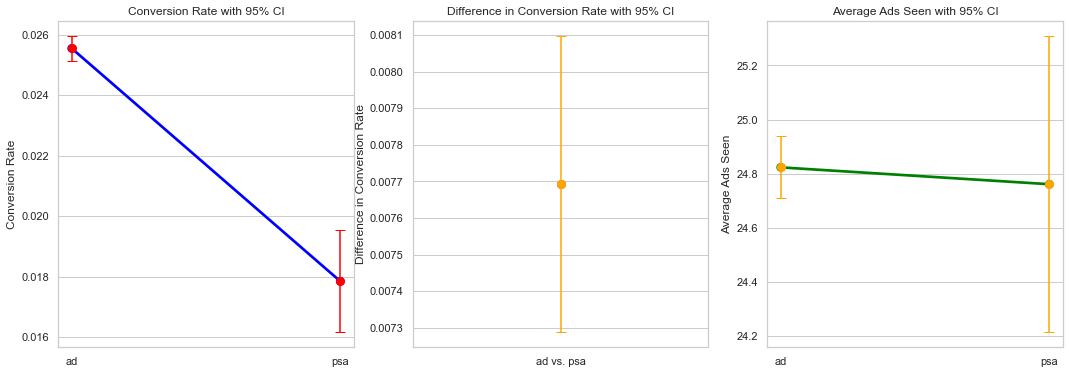

In [31]:
# Подготовка данных для графика
conversion_ad = data[data['test group'] == 'ad']['converted']
conversion_psa = data[data['test group'] == 'psa']['converted']

ads_ad = data[data['test group'] == 'ad']['total ads']
ads_psa = data[data['test group'] == 'psa']['total ads']

# Строим 95% доверительные интервалы
conf_interval_conversion_ad = sm.stats.proportion_confint(conversion_ad.sum(), len(conversion_ad))
conf_interval_conversion_psa = sm.stats.proportion_confint(conversion_psa.sum(), len(conversion_psa))
conf_interval_diff_conversion = sm.stats.proportion_confint(conversion_ad.sum() - conversion_psa.sum(), len(conversion_ad))
conf_interval_ads_ad = sm.stats.DescrStatsW(ads_ad).tconfint_mean()
conf_interval_ads_psa = sm.stats.DescrStatsW(ads_psa).tconfint_mean()

# Вывод результатов
print("95% Доверительный интервал для конверсии в группе ad:", conf_interval_conversion_ad)
print("95% Доверительный интервал для конверсии в группе psa:", conf_interval_conversion_psa)
print("95% Доверительный интервал для разницы конверсий в группах:", conf_interval_diff_conversion)
print("95% Доверительный интервал для среднего количества увиденной рекламы в группе ad:", conf_interval_ads_ad)
print("95% Доверительный интервал для среднего количества увиденной рекламы в группе psa:", conf_interval_ads_psa)

# Построение графика
plt.figure(figsize=(18, 6))

# График конверсии
plt.subplot(1, 3, 1)
sns.pointplot(x=['ad', 'psa'], y=[conversion_ad.mean(), conversion_psa.mean()], ci=None, color='blue')
plt.errorbar(x=['ad', 'psa'], y=[conversion_ad.mean(), conversion_psa.mean()],
             yerr=[(conf_interval_conversion_ad[1] - conf_interval_conversion_ad[0]) / 2,
                   (conf_interval_conversion_psa[1] - conf_interval_conversion_psa[0]) / 2],
             fmt='o', color='red', markersize=8, capsize=5)
plt.title('Conversion Rate with 95% CI')
plt.ylabel('Conversion Rate')

# График разницы конверсий
plt.subplot(1, 3, 2)
sns.pointplot(x=['ad vs. psa'], y=[conversion_ad.mean() - conversion_psa.mean()], ci=None, color='purple')
plt.errorbar(x=['ad vs. psa'], y=[conversion_ad.mean() - conversion_psa.mean()],
             yerr=[(conf_interval_diff_conversion[1] - conf_interval_diff_conversion[0]) / 2],
             fmt='o', color='orange', markersize=8, capsize=5)
plt.title('Difference in Conversion Rate with 95% CI')
plt.ylabel('Difference in Conversion Rate')

# График увиденной рекламы
plt.subplot(1, 3, 3)
sns.pointplot(x=['ad', 'psa'], y=[ads_ad.mean(), ads_psa.mean()], ci=None, color='green')
plt.errorbar(x=['ad', 'psa'], y=[ads_ad.mean(), ads_psa.mean()],
             yerr=[(conf_interval_ads_ad[1] - conf_interval_ads_ad[0]) / 2,
                   (conf_interval_ads_psa[1] - conf_interval_ads_psa[0]) / 2],
             fmt='o', color='orange', markersize=8, capsize=5)
plt.title('Average Ads Seen with 95% CI')
plt.ylabel('Average Ads Seen')

plt.show()



**Конверсии:**

- **Группа ad:** 95% доверительный интервал для конверсии находится между примерно 2.51% и 2.60%.
- **Группа psa:** 95% доверительный интервал для конверсии находится между примерно 1.62% и 1.95%.

**Вывод:** Доверительные интервалы для конверсии в обеих группах не пересекаются, что может свидетельствовать о статистически значимой разнице в конверсиях между группами.

**Среднее количество увиденной рекламы:**

- **Группа ad:** 95% доверительный интервал для среднего количества увиденной рекламы находится между примерно 24.71 и 24.94.
- **Группа psa:** 95% доверительный интервал для среднего количества увиденной рекламы находится между примерно 24.21 и 25.31.

**Вывод:** 
Доверительные интервалы для среднего количества увиденной рекламы в обеих группах пересекаются, что может указывать на отсутствие статистически значимой разницы между группами по этому параметру.

## На основе проведенного анализа, можно сделать следующие выводы:

1) **Будет ли кампания успешной?**

Да, кампания имеет потенциал быть успешной, поскольку конверсия в тестовой группе (контакт с рекламой) статистически значимо выше, чем в контрольной группе (контакт с государственным объявлением).

2) **На сколько успех можно объяснить рекламой?**

Реклама оказывает значительное положительное влияние на конверсию. Разница в конверсии между тестовой и контрольной группами подтверждает, что рекламная кампания способствует более успешным результатам.
Таким образом, на основе текущих данных, можно предположить, что рекламная кампания является ключевым фактором в достижении успеха. 